# <u>Spanish poetry dataset: EDA and NLP basics </u>

In this work, we part from a dataset with raw text scrapped from a webpage, and we carry out a basic NLP covering all the relevant tasks that must be tackled in this kind of problem. We cover an exploratory data analysis of the corpus with the most relevant information extracted from the textual data, a preprocessing task, sentimental analysis, and finally a toy Word Embedding model to test similarity words in the corpus. We end with some conclusions of our work and some ideas for the future. 


# Exploration Data Analysis
*Exploration Data Analysis* (EDA) is essential in data science as well as critical to get how to deal with a specific dataset. In this sheet, we will explore a dataset with the main goal of understanding how it is work, how it is made of and, the most important conclusion that we could extract at a first sight.


## Our data set 
We will explore a poetry dataset cooked by us, with scrapped textual data obtained from a Spanish poetry blog of famous authors (link [here](https://www.poemas-del-alma.com)). 



## Loading libraries

First thing is to load the libraries that we need to run this script. 
We will use pandas to work with the dataset as well as matplotlib to generate some useful visualizations 

In [2]:
# Libraries

# Packages for managing the dataset
import pandas as pd
import matplotlib.pyplot as plt

We load the dataset from a .csv file. We print its initial shape... It is formed by 5133 rows and 3 columns. 

In [3]:
url = 'https://raw.githubusercontent.com/andreamorgar/poesIA/master/data/poems.csv'
# Load poem dataset
poems_df = pd.read_csv(url)
print(poems_df.shape)

(5133, 3)


## Dataset description
We can see below a general description of the dataset. We know now that we have 5131 poems consisted of their author, title, and content.

In [4]:
poems_df.describe()

,author,content,title
count,5131,5131,5131
unique,267,5128,4842
top,Pablo Neruda,\n\n,Cien sonetos de amor
freq,357,2,100


We can group the data by the author to get a better data organization. For example, we have 4 poems written by Alberto Guirri and 11 by Alejandra Pizarnik.

In [6]:
# Groupby by author
authors = poems_df.groupby("author")

# Summary statistic of all authors in corpus
authors.describe().head()

content         ...                        title     
                     count unique  ...                          top freq
author                             ...                                  
Alberto Girri            4      4  ...                    LA SOMBRA    1
Alejandra Pizarnik      11     11  ...                    SOLAMENTE    1
Alfonsina Storni        20     20  ...                  Golondrinas    1
Alfonso Reyes            3      3  ...  A ENRIQUE GONZÁLEZ MARTÍNEZ    1
Alfonso X el sabio       2      2  ...                    CANTIGA X    1

[5 rows x 8 columns]

With the plot below we can see the most recurrent authors in the dataset. We can see that the most-posted author is Pablo Neruda with more than 350 blog entries. It is followed by Góngora and Benedetti. Notice that poems from recognized authors can be found in this dataset. For a poetry fan... what a dataset to be working with! 😄 

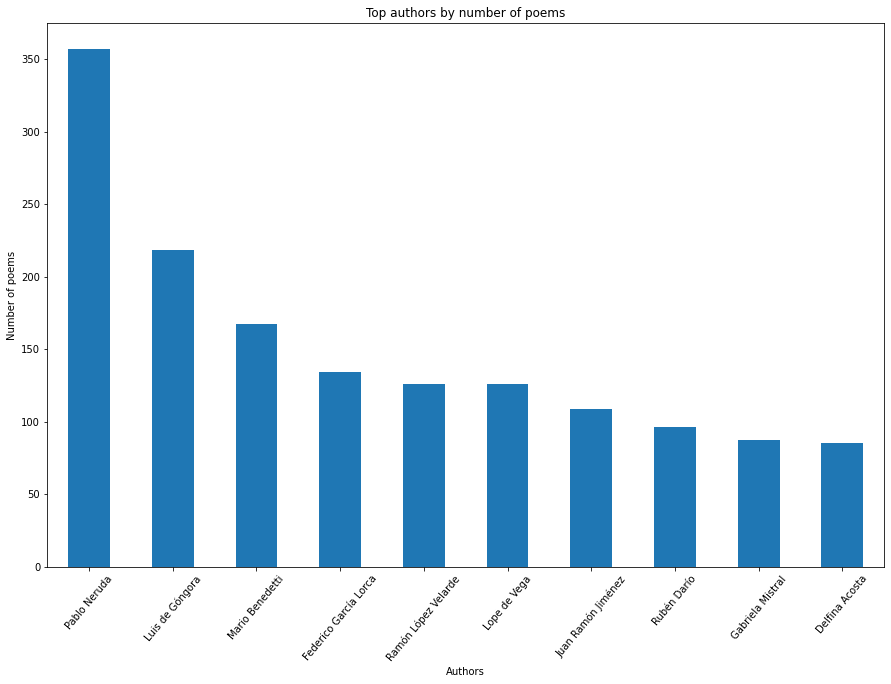

In [7]:
plt.figure(figsize=(15,10))

authors.size().sort_values(ascending=False).iloc[0:10].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Authors")
plt.ylabel("Number of poems")
plt.title("Top authors by number of poems")
plt.show()

# Data preprocessing

Before going on with the exploration task, we need to work a little on the raw data we are dealing with. We need to remember that our data comes from HTML scrapped pages. There could be some characters from HTML pages that we need to remove (numbers, special characters, ...), as well as some details that we should get ridden to obtain powerful results!


In this section, we carry out a typical preprocessing and cleaning task that allows us to continue with EDA!



## Import libraries

First, we need to import all libraries implied in this preprocessing task. 

We import the nltk package to deal with NLP tasks. Notice that we download the most popular packages inside it. It is needed for the stopword remove. We also download the Tokenizer, the Lemmatizer, and the Stemmer. 

In [8]:
import string

import nltk
nltk.download("popular") 

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

The first thing we need to remove from the text is the endline characters. Notice below that we can see: \n\r. We need to remove it because they don't provide us useful information.

In [9]:
poems_df.content


0       \n\r\nEn el parque confuso\r\nQue con lánguida...
1       \n\r\nPorque si tú no velas, vendré como ladró...
2       \n\r\nPequeña de mis sueños, por tu piel las p...
3       \n\r\nLos dedos de la nieve\r\nrepiquetearon\r...
4       Naciste en Armenia,\r\npero te fuiste a vivir ...
                              ...                        
5128    \n¿Vienes? Me llega aquí, pues que suspiras, \...
5129    \n\r\nNada es memoria: todo es invención.\r\nL...
5130    \nFelicidad: Muy dentro de tí.\r\nSerenidad: E...
5131    \nMis manos \r\nabren las cortinas de tu ser \...
5132    \n\r\nY ahora danos\r\nuna muerte honorable,\r...
Name: content, Length: 5133, dtype: object

A simple way of doing this is to replace all this kind of character with an empty space. This replacement is not an issue, because later we will clean all the extra characters, spaces included. 

In [10]:
# first we remove \n from the text
poems_df.content = poems_df.content.str.replace('\n',' ')
poems_df.content

0        \r En el parque confuso\r Que con lánguidas b...
1        \r Porque si tú no velas, vendré como ladrón;...
2        \r Pequeña de mis sueños, por tu piel las pal...
3        \r Los dedos de la nieve\r repiquetearon\r en...
4       Naciste en Armenia,\r pero te fuiste a vivir a...
                              ...                        
5128     ¿Vienes? Me llega aquí, pues que suspiras, \r...
5129     \r Nada es memoria: todo es invención.\r Lo q...
5130     Felicidad: Muy dentro de tí.\r Serenidad: En ...
5131     Mis manos \r abren las cortinas de tu ser \r ...
5132     \r Y ahora danos\r una muerte honorable,\r vi...
Name: content, Length: 5133, dtype: object

In [11]:
# second we remove \r
poems_df.content = poems_df.content.str.replace('\r',' ')
# we replace with a space bc in this way we dont join words
poems_df.content

0          En el parque confuso  Que con lánguidas bri...
1          Porque si tú no velas, vendré como ladrón; ...
2          Pequeña de mis sueños, por tu piel las palo...
3          Los dedos de la nieve  repiquetearon  en el...
4       Naciste en Armenia,  pero te fuiste a vivir al...
                              ...                        
5128     ¿Vienes? Me llega aquí, pues que suspiras,   ...
5129       Nada es memoria: todo es invención.  Lo que...
5130     Felicidad: Muy dentro de tí.  Serenidad: En c...
5131     Mis manos   abren las cortinas de tu ser   te...
5132       Y ahora danos  una muerte honorable,  vieja...
Name: content, Length: 5133, dtype: object

Once we have deal with the special characters added in the poems, we have a dataset of documents only formed by words. At this point, we proceed to clean the text in order to remove punctuation marks, special characters, and finally obtain a tokenized lowercased set. In the output below, we can see the token set obtained with the words in each poem.

In [12]:
tokenizer = RegexpTokenizer(r'\w+')
poems_df['content'] = poems_df['content'].apply(lambda x: tokenizer.tokenize(str(x).lower()))

poems_df.content


0       [en, el, parque, confuso, que, con, lánguidas,...
1       [porque, si, tú, no, velas, vendré, como, ladr...
2       [pequeña, de, mis, sueños, por, tu, piel, las,...
3       [los, dedos, de, la, nieve, repiquetearon, en,...
4       [naciste, en, armenia, pero, te, fuiste, a, vi...
                              ...                        
5128    [vienes, me, llega, aquí, pues, que, suspiras,...
5129    [nada, es, memoria, todo, es, invención, lo, q...
5130    [felicidad, muy, dentro, de, tí, serenidad, en...
5131    [mis, manos, abren, las, cortinas, de, tu, ser...
5132    [y, ahora, danos, una, muerte, honorable, viej...
Name: content, Length: 5133, dtype: object

Also, we remove the stopwords in each poem. These *stopwords* are very used vocabulary that does not provide substantial information (pronouns, determinants, and so on). In this case, we have Spanish vocab, so we need to use a Spanish stopword list. This set is also provided by the nltk library.

We can see below the final preprocessed corpus formed by the words in each poem. 



In [13]:
stop_words_sp = set(stopwords.words('spanish'))

def remove_stopwords(text):
  res = [word for word in text if word not in stop_words_sp]
  return res

poems_df['content'] = poems_df['content'].apply(lambda x: remove_stopwords(x))
poems_df.content


0       [parque, confuso, lánguidas, brisas, cielo, sa...
1       [si, velas, vendré, ladrón, llegar, sepas, hor...
2       [pequeña, sueños, piel, palomas, pálida, prese...
3       [dedos, nieve, repiquetearon, tamboril, espaci...
4       [naciste, armenia, vivir, mundo, tres, nombres...
                              ...                        
5128    [vienes, llega, aquí, pues, suspiras, soplo, m...
5129    [memoria, invención, recuerdo, invento, obra, ...
5130    [felicidad, dentro, tí, serenidad, cada, amane...
5131    [manos, abren, cortinas, ser, visten, desnudez...
5132    [ahora, danos, muerte, honorable, vieja, madre...
Name: content, Length: 5133, dtype: object

# Text data visualizations

Once the data is clean, we can carry out text visualization to get a general schema of the words used in the data set. This is going to give us a better understanding of the nature of the data we use. 

<br>

## Wordcloud 

First, we are going to visualize the word cloud of the dataset. With this visualization, we will see the most-used words in the whole corpus. Notice that the font size of the words is relevant: most-used words are the biggest ones!

In our corpus, *día*, *sueño* and *noche* are examples of the most popular words. This is not a surprise: they are such poetic words!

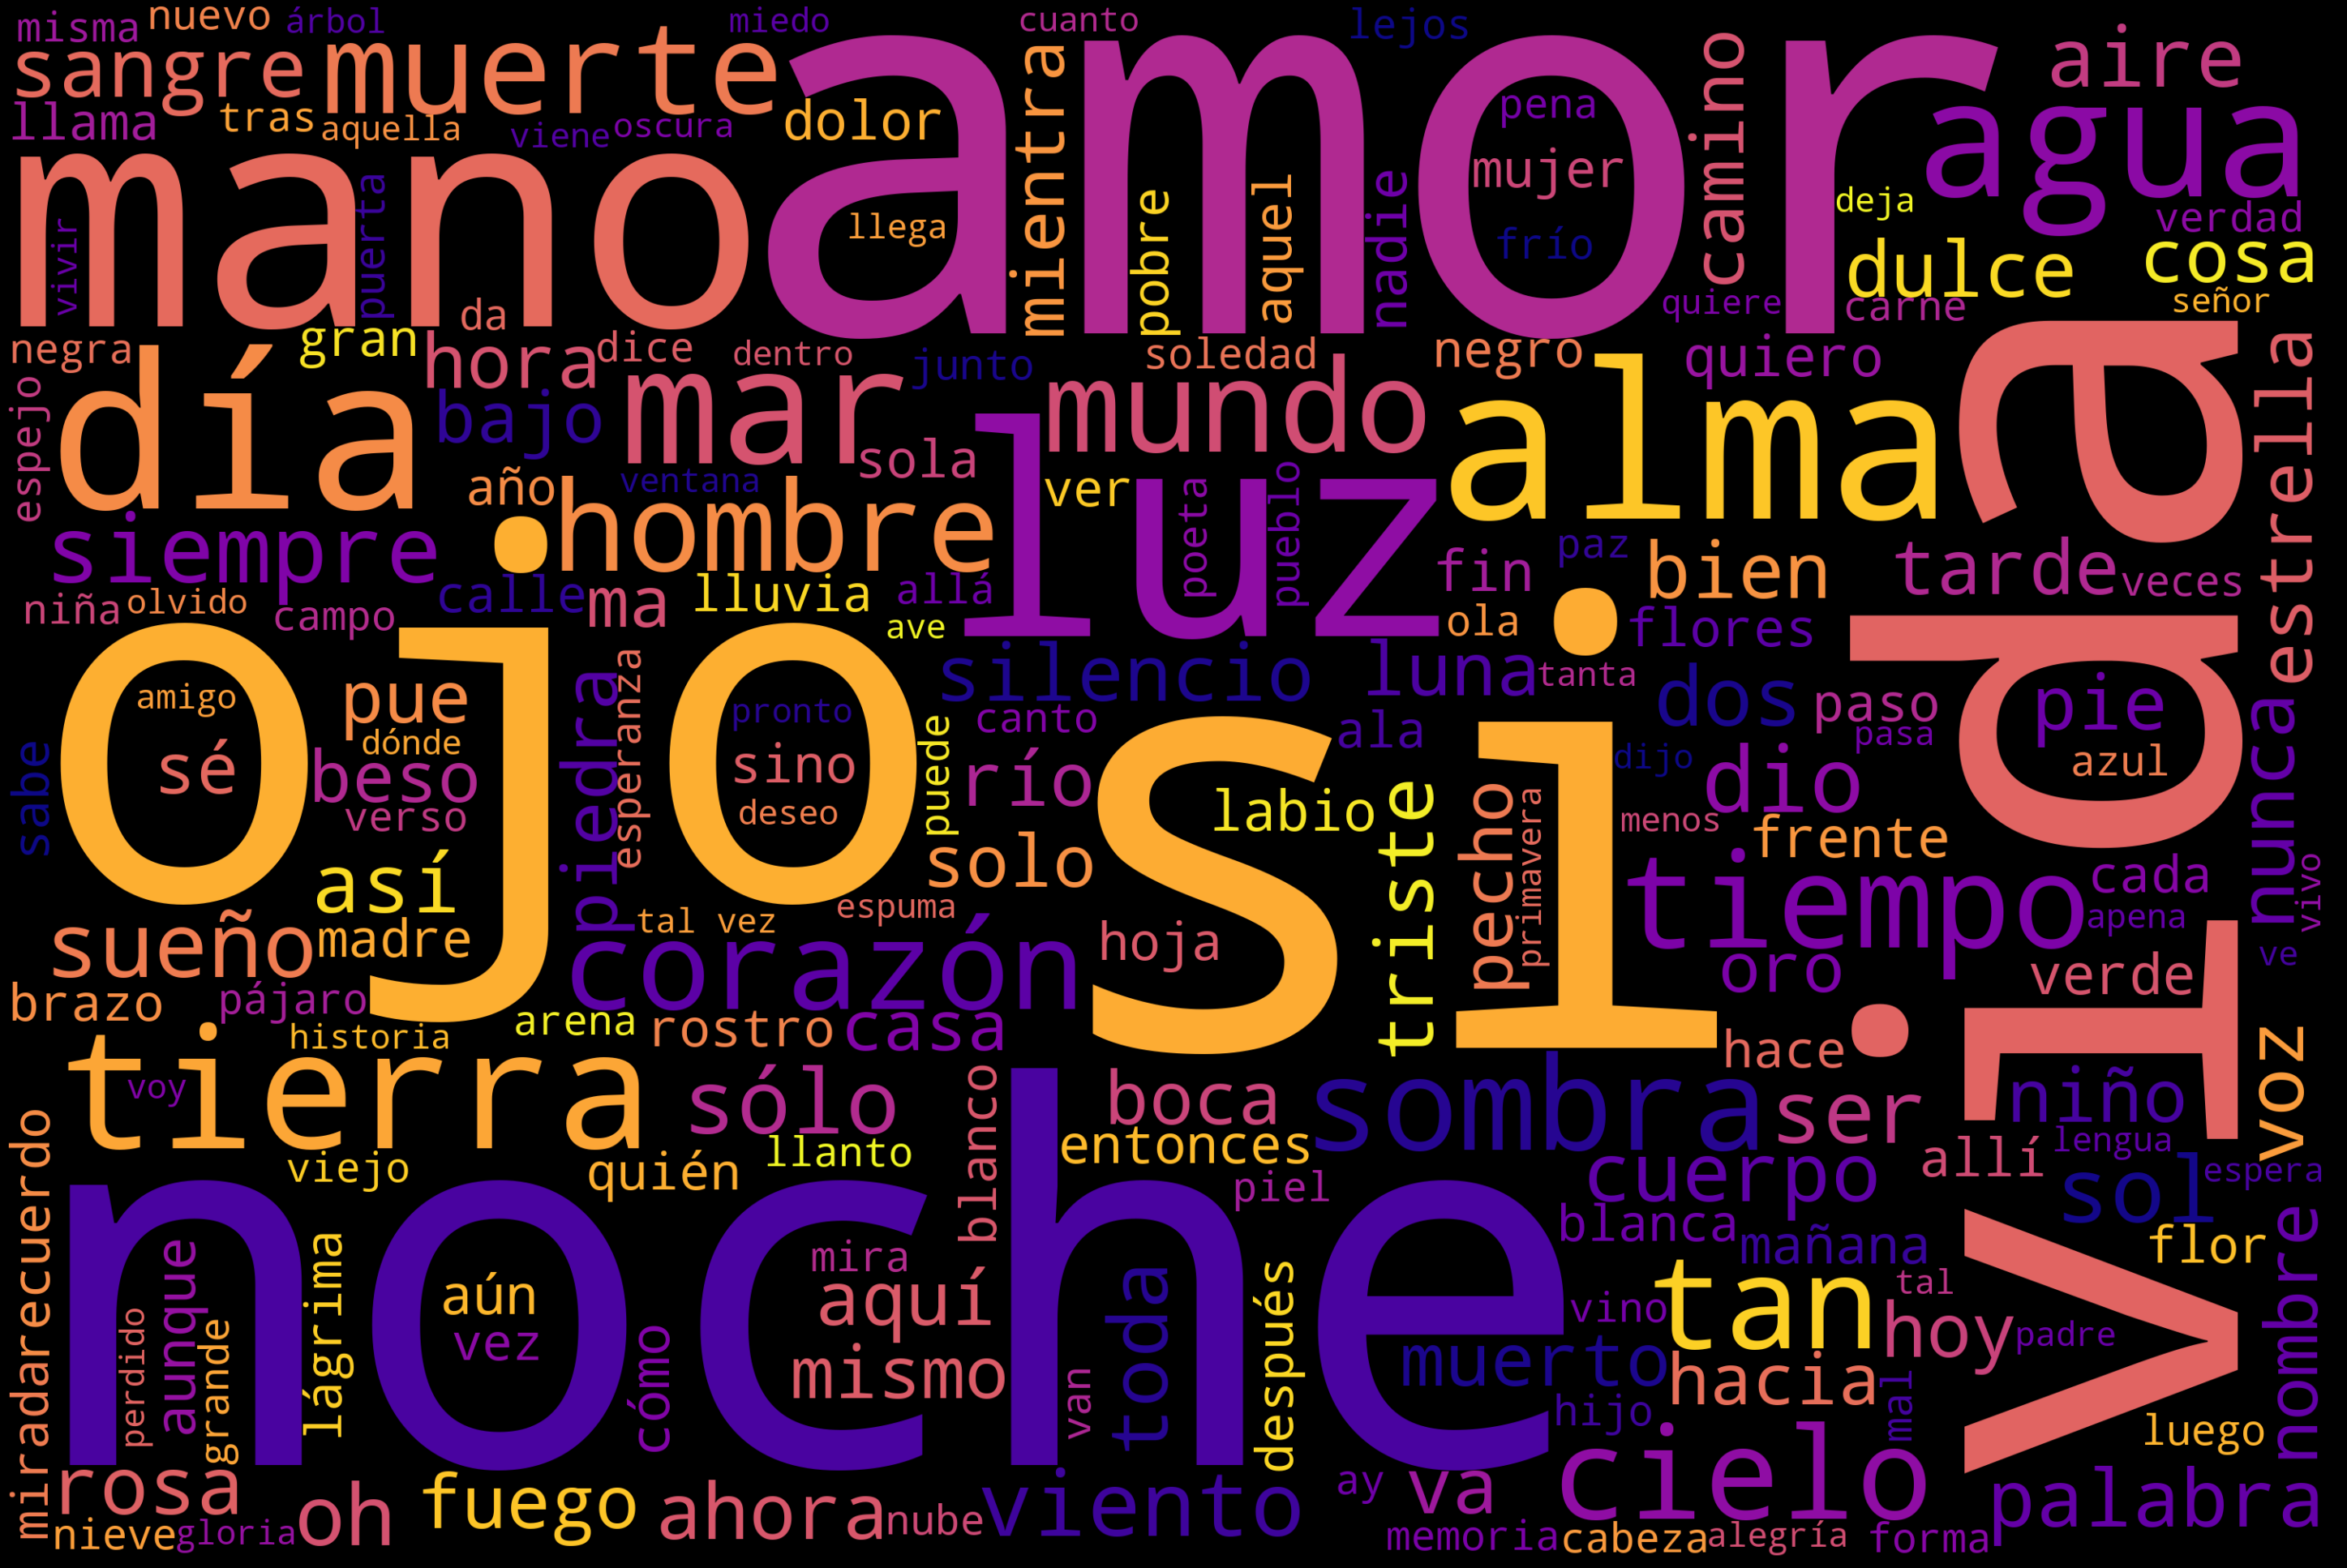

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = [" ".join(x) for x in list(poems_df.content)]

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    colormap = 'plasma',
    background_color = 'black').generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()




# Word Count

Apart from the word cloud, we can carry out a more detailed word count study. Here, we are going to count the most frequent words that appeared in the content of the poems so we can get an overall idea of the scope and focus of the corpus.

In [14]:
from collections import Counter
text = [y  for x in list(poems_df.content) for y in x ]
count_words = Counter(text)

We get the 20 most frequent words in all the text and we represent them in a bar chart. We can appreciate here the most-used words detected by the word cloud too.



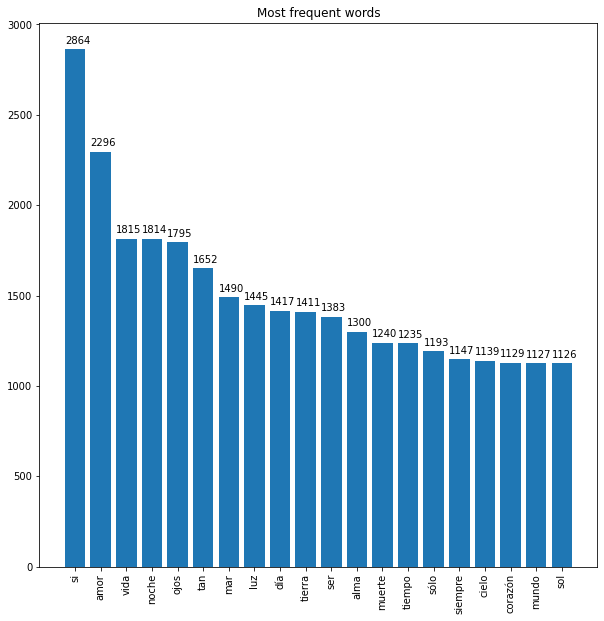

In [15]:
most_popular_words = count_words.most_common()[:20]
words = [x[0] for x in most_popular_words]
count = [x[1] for x in most_popular_words]

plt.figure(figsize=(10,10))
bars=plt.bar(words, count)
plt.xticks(rotation='vertical')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 30, yval) #rotation='vertical'
plt.title('Most frequent words')
plt.show()

As we see 'día' and 'noche' are very frequent despite of having opposite meanings. We are going to count them by author.

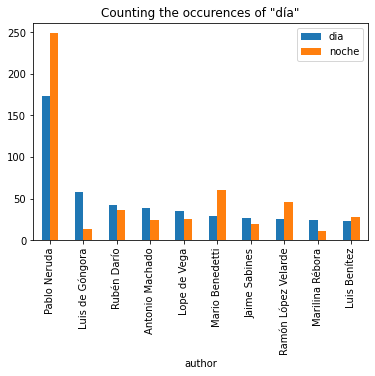

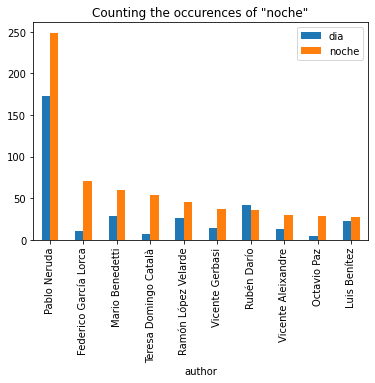

In [16]:
size = poems_df.groupby(['author']).agg('size') #number of poems by author

# A column that indicates the count of these words in the content
poems_df['dia']=poems_df.apply(lambda row : Counter(row['content'])['día'], axis=1) 
poems_df['noche']=poems_df.apply(lambda row : Counter(row['content'])['noche'], axis=1) 

# we sum the count of the words by author
authors_dia_noche = poems_df.groupby(['author']).agg(
    {
         'dia':sum,    # get the count of dia
         'noche': sum  # get the count of noche
    }
)

authors_dia_noche.sort_values(ascending=False, by='dia').iloc[0:10].plot.bar()
plt.title('Counting the occurences of "día"')
authors_dia_noche.sort_values(ascending=False, by='noche').iloc[0:10].plot.bar()
plt.title('Counting the occurences of "noche"')
plt.show()

Seems like some authors were more prolific than others. Below are the charts in which we can see respectively the graphs ordered by the count of *día* and *noche*. Notice that the most of authors who use *día*, use its opposite too. Clearly, antithesis is very often in poetry, and as we see below, they cannot be missed here!

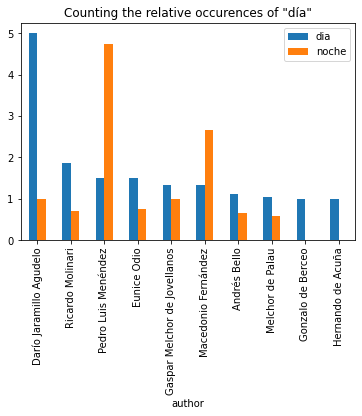

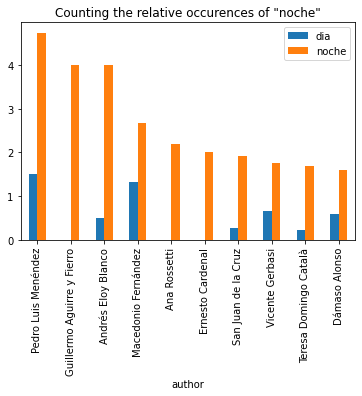

In [17]:
authors_dia_noche['dia'] = authors_dia_noche['dia']/size
authors_dia_noche['noche'] = authors_dia_noche['noche']/size
authors_dia_noche.sort_values(ascending=False, by='dia').iloc[0:10].plot.bar()
plt.title('Counting the relative occurences of "día"')
authors_dia_noche.sort_values(ascending=False, by='noche').iloc[0:10].plot.bar()
plt.title('Counting the relative occurences of "noche"')
plt.show()

The same applies to the pair sol and luna. Again we can see below the poets who use the most these words. The first chart shows the poets who use the word sol the most, and the second chart shows the same for luna.

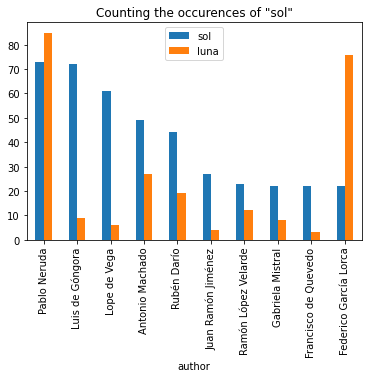

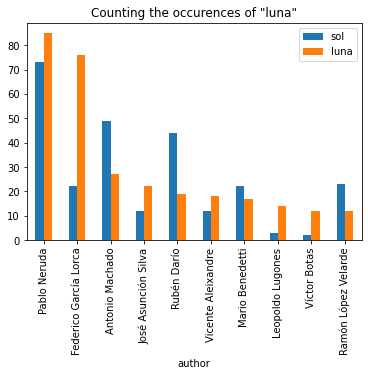

In [18]:
 poems_df['sol']=poems_df.apply(lambda row : Counter(row['content'])['sol'], axis=1) 
 poems_df['luna']=poems_df.apply(lambda row : Counter(row['content'])['luna'], axis=1) 
 authors_dia_noche = poems_df.groupby(['author']).agg(
    {
         'sol':sum,    # get the count of sol
         'luna': sum,  # get the count of luna
    }
)
authors_dia_noche.sort_values(ascending=False, by='sol').iloc[0:10].plot.bar()
plt.title('Counting the occurences of "sol"')
authors_dia_noche.sort_values(ascending=False, by='luna').iloc[0:10].plot.bar()
plt.title('Counting the occurences of "luna"')
plt.show()

# Sentiment Analysis

Poets write to put in words their souls and write about their deepest feelings and sentiments are always around, so we could not let this opportunity pass without a Sentiment Analysis. Sorry, it is just a matter of feeling 😎 

In particular, we are going to analyze the sentiment of the poems. This means that for a given poem we can calculate if it expresses a good or a bad feeling and how good or bad is this sentiment. Amazing, isn't it? 😍

For this experiment, we are going to select the poems of Pablo Neruda and we will find which is the most positive and the most negative ones. The reason for this is that, as we saw earlier, Neruda is one of the most-posted authors, so we will have lots of poems to analyze!


### Procedure

1. Get poems in an appropriate form
The first thing to take into account is that at the moment, our poems are lists of preprocessed token sets, so we need to obtain them in a *document* form. The easiest way of doing this is by joining the token lists with a space in the middle of each two words.

 **Example**: ['i', 'love', 'you'] turns to be ''i love you''.


In [19]:
# First we join the poem tokens to get a readable pre-processed text
poems_df['content_joined'] = poems_df.content.apply(lambda x: " ".join(x))

# see content_joined column for some results
poems_df.head()

,author,content,title,dia,noche,sol,luna,content_joined
0,Leopoldo Lugones,"[parque, confuso, lánguidas, brisas, cielo, sa...",LA MUERTE DE LA LUNA,0,2,0,4,parque confuso lánguidas brisas cielo sahúma c...
1,Marilina Rébora,"[si, velas, vendré, ladrón, llegar, sepas, hor...",PORQUE SI TÚ NO VELAS,0,0,0,0,si velas vendré ladrón llegar sepas hora estat...
2,Antonio Colinas,"[pequeña, sueños, piel, palomas, pálida, prese...",POEMA DE LA BELLEZA CAUTIVA QUE PERDÍ,0,2,0,1,pequeña sueños piel palomas pálida presencia l...
3,José María Hinojosa,"[dedos, nieve, repiquetearon, tamboril, espaci...",SENCILLEZ,0,0,0,0,dedos nieve repiquetearon tamboril espacio par...
4,Rubén Izaguirre Fiallos,"[naciste, armenia, vivir, mundo, tres, nombres...",Breve Carta a Consuelo Suncín,0,0,0,0,naciste armenia vivir mundo tres nombres josé ...


Once we have pre-processed poems we are going to apply sentiment analysis to each one of them. For this aim we will use *Textglob* library, so we need to import it. We also obtain a subset of poems that corresponds to Pablo Neruda. 



In [20]:
from textblob import TextBlob # library for sentiment analysis
poems_neruda = poems_df[poems_df.author == 'Pablo Neruda'] # we select the poems of Neruda
poems_neruda.head()

,author,content,title,dia,noche,sol,luna,content_joined
7,Pablo Neruda,"[cien, sonetos, amor, trajo, amor, cola, dolor...",Cien sonetos de amor,0,0,0,0,cien sonetos amor trajo amor cola dolores larg...
20,Pablo Neruda,"[mar, tormentoso, chile, vive, rosado, congrio...",Oda al caldillo de congrio,0,0,0,0,mar tormentoso chile vive rosado congrio gigan...
48,Pablo Neruda,"[recabarren, hijo, chile, padre, chile, padre,...",Padre de Chile,0,0,0,0,recabarren hijo chile padre chile padre constr...
59,Pablo Neruda,"[patria, monte, patria, río, ven, conmigo, noc...",El monte y el río,0,1,0,0,patria monte patria río ven conmigo noche mont...
95,Pablo Neruda,"[pie, niño, aún, sabe, pie, quiere, ser, marip...",Al pie desde su niño,0,0,0,0,pie niño aún sabe pie quiere ser mariposa manz...


The next cell is not executed every time we use the notebook because it uses the API of Google for translation. The API of Google has a limit of requests. We saved the sentiment results and we load them in the following cell, but here there are the steps to reproduce it!

In [21]:
# poems_neruda.shape

# poems_neruda['sentiment'] = poems_neruda.apply(lambda row: TextBlob(row['content_joined']).translate(to='en').sentiment.polarity, axis=1)
# poems_neruda.head()
# poems_neruda.to_csv("neruda_last .csv", index = False)

We simply load the .csv file with the sentiment values from the poems. See below a preliminary visualization of how these sentiment values are saved (float numbers).

In [22]:
poems_neruda = pd.read_csv(sst_home + 'neruda_last.csv') # we load Neruda sentiments
poems_neruda.columns
poems_neruda['sentiment'] = poems_neruda.sentiment.astype(float)
poems_neruda.head()


,author,content,title,original_content,content_joined,sentiment
0,Pablo Neruda,"['cien', 'sonetos', 'amor', 'trajo', 'amor', '...",Cien sonetos de amor,Cien sonetos de amor\r\n\nTrajo el amor su col...,cien sonetos amor trajo amor cola dolores larg...,0.159779
1,Pablo Neruda,"['mar', 'tormentoso', 'chile', 'vive', 'rosado...",Oda al caldillo de congrio,EN el mar\r\ntormentoso\r\nde Chile\r\nvive el...,mar tormentoso chile vive rosado congrio gigan...,0.000000
2,Pablo Neruda,"['recabarren', 'hijo', 'chile', 'padre', 'chil...",Padre de Chile,"Recabarren, hijo de Chile,\r\npadre de Chile, ...",recabarren hijo chile padre chile padre constr...,0.055556
3,Pablo Neruda,"['patria', 'monte', 'patria', 'río', 'ven', 'c...",El monte y el río,EN mi patria hay un monte.\r\nEn mi patria hay...,patria monte patria río ven conmigo noche mont...,-0.321065
4,Pablo Neruda,"['pie', 'niño', 'aún', 'sabe', 'pie', 'quiere'...",Al pie desde su niño,"El pie del niño aún no sabe que es pie,\r\ny q...",pie niño aún sabe pie quiere ser mariposa manz...,0.029431


Now we are going to sort the poems by sentiment value, to get the saddest poem in our dataset with the darkest feelings that Neruda wrote. 

In [23]:
# more negative
negative = poems_neruda.sort_values('sentiment')
negative.head()

,author,content,title,original_content,content_joined,sentiment
242,Pablo Neruda,"['fierro', 'negro', 'duerme', 'fierro', 'negro...",Maestranzas de noche,"Fierro negro que duerme, fierro negro que gime...",fierro negro duerme fierro negro gime cada por...,-0.325000
3,Pablo Neruda,"['patria', 'monte', 'patria', 'río', 'ven', 'c...",El monte y el río,EN mi patria hay un monte.\r\nEn mi patria hay...,patria monte patria río ven conmigo noche mont...,-0.321065
290,Pablo Neruda,"['recabarren', 'días', 'persecución', 'angusti...",Envío (1949),"Recabarren, en estos días\r\nde persecución, e...",recabarren días persecución angustia hermanos ...,-0.316667
250,Pablo Neruda,"['tigre', 'acecho', 'hojas', 'anchas', 'lingot...",El tigre,\nSoy el tigre. \r\nTe acecho entre las hojas ...,tigre acecho hojas anchas lingotes mineral moj...,-0.300000
189,Pablo Neruda,"['llamar', 'aquí', 'si', 'aquí', 'hermanos', '...",Están aquí,He de llamar aquí como si aquí estuvieran.\r\n...,llamar aquí si aquí hermanos sabed lucha conti...,-0.300000


The most negative poem of Neruda is shown below. As we expected, he talks about darkness, nostalgia, loneliness, hopelessness, and so on. So touching🤧


In [24]:
print(negative.original_content.iloc[0])

Fierro negro que duerme, fierro negro que gime
por cada poro un grito de desconsolación.

Las cenizas ardidas sobre la tierra triste,
los caldos en que el bronce derritió su dolor.

Aves de qué lejano país desventurado
graznaron en la noche dolorosa y sin fin?

Y el grito se me crispa como un nervio enroscado
o como la cuerda rota de un violín.

Cada máquina tiene una pupila abierta
para mirarme a mí.

En las paredes cuelgan las interrogaciones,
florece en las bigornias el alma de los bronces
y hay un temblor de pasos en los cuartos desiertos.

Y entre la noche negra -desesperadas- corren
y sollozan las almas de los obreros muertos.


We replicate the process to obtain the most positive poem of Neruda. Below we can see the most joyful Neruda Poems. 

In [25]:
# more positive
positive = poems_neruda.sort_values('sentiment', ascending=[False])
positive.head()

,author,content,title,original_content,content_joined,sentiment
171,Pablo Neruda,"['bella', 'piedra', 'fresca', 'manantial', 'ag...",Bella,"BELLA,\r\ncomo en la piedra fresca\r\ndel mana...",bella piedra fresca manantial agua abre ancho ...,0.565025
345,Pablo Neruda,"['feliz', 'opiné', 'delante', 'sabio', 'examin...",Sin embargo me muevo,"De cuando en cuando soy feliz!,\r\nopiné delan...",feliz opiné delante sabio examinó pasión demos...,0.507692
6,Pablo Neruda,"['cien', 'sonetos', 'amor', 'volar', 'tiempo',...",Cien sonetos de amor,Cien sonetos de amor\r\n\nHay que volar en est...,cien sonetos amor volar tiempo dónde alas avió...,0.506061
31,Pablo Neruda,"['vez', 'dejadme', 'ser', 'feliz', 'pasado', '...",Oda al día feliz,"ESTA vez dejadme\r\nser feliz,\r\nnada ha pasa...",vez dejadme ser feliz pasado nadie parte algun...,0.502614
312,Pablo Neruda,"['cien', 'sonetos', 'amor', 'olvidé', 'manos',...",Cien sonetos de amor,Cien sonetos de amor\r\n\nPero olvidé que tus ...,cien sonetos amor olvidé manos satisfacían raí...,0.500000


We print the most joyful one as well, and it could not be more charming!! It talks about beauty, love, illusion, hope, and nature. I have not enough of this 😍🥰

In [26]:
print(positive.original_content.iloc[0])

BELLA,
como en la piedra fresca
del manantial, el agua
abre un ancho relámpago de espuma,
así es la sonrisa en tu rostro,
bella.

Bella,
de finas manos y delgados pies
como un caballito de plata,
andando, flor del mundo,
así te veo,
bella.

Bella,
con un nido de cobre enmarañado
en tu cabeza, un nido
color de miel sombría
donde mi corazón arde y reposa,
bella.

Bella,
no te caben los ojos en la cara,
no te caben los ojos en la tierra.
Hay países, hay ríos
en tus ojos,
mi patria está en tus ojos,
yo camino por ellos,
ellos dan luz al mundo
por donde yo camino,
bella.

Bella,
tus senos son como dos panes hechos
de tierra cereal y luna de oro,
bella.

Bella,
tu cintura
la hizo mi brazo como un río cuando
pasó mil años por tu dulce cuerpo,
bella.

Bella,
no hay nada como tus caderas,
tal vez la tierra tiene
en algún sitio oculto
la curva y el aroma de tu cuerpo,
tal vez en algún sitio,
bella.

Bella, mi bella,
tu voz, tu piel, tus uñas
bella, mi bella,
tu ser, tu luz, tu sombra,
bella,
tod

# Word embedding

Now we have an overall summary of the data within the dataset but, what's more? After the word counts analysis as well the word cloud, it seems logical to obtain the semantic representation of the vocabulary involved. Word embedding models allow us to carry out many NLP tasks, involving similarity relations, equivalent item identification, and so on. We are going to use the pre-processed text from the poems to build a predictive model for future tasks. In this case, we are using Word2vec, the Word Embedding model developed by Mikolov (2013) which uses the co-occurrence of the words on the corpus to capture the semantic of its vocabulary. With this algorithm, we convert words to numeric vectors which captures their semantic, and later we'll be able to resolve similarity problems between the words in the corpus.

We use the NLP library Gensim for this, and we tune the hyperparameters as it follows:

- ```min_count```: minimum number of times that a word must appear to be part of the vocabulary of the model
- ```size```: the size of the numeric vector representations for each word in the vocabulary
- ```workers```: number of threads used to train the model
- ```window```: the size of the context considered for each word
- ```sg```: to use the skip-gram implementation on Word2vec. This implementation works well with small datasets therefore it is the most appropriate to be used here. 

But before training, we are aware that some words use to appear always together... our model must deal with these cases, at least in a simple way! For that, we have trained a toy bigram model that detects pair of words like *cada día* o *alguna vez*. It works very simply: it detects which words usually appear together and when it found them together... they treat them as only one word.


In [29]:
from gensim.models.phrases import Phrases
tokens = [list(doc) for doc in list(poems_df.content)]

# train bigram model
bigram_mdl = Phrases(tokens, min_count=1, threshold=2)
# obtain the bigrams in the training corpus
bigrams = bigram_mdl[tokens]

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [30]:
from gensim.models import Word2Vec

# train Word2vec model
model = Word2Vec(bigrams, min_count=50,size= 300,workers=3, window =5, sg = 1)

# we show the vocabulary of the model
print(list(model.wv.vocab))

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['cielo', 'plata', 'después', 'horizonte', 'mar', 'frente', 'luna', 'bien', 'flor', 'brillo', 'noche', 'va', 'forma', 'reloj', 'vida', 'cada', 'parece', 'canto', 'voz', 'hombre', 'arde', 'calor', 'negro', 'reina', 'espíritu', 'miedo', 'tras', 'fin', 'tinieblas', 'sombrío', 'huellas', 'azar', 'eternidad', 'estrellas', 'peso', 'sueño', 'aroma', 'estío', 'antiguo', 'cansancio', 'ilusión', 'alguna', 'apaga', 'brisa', 'ojos', 'si', 'velas', 'llegar', 'hora', 'pues', 'aunque', 'nombre', 'vivo', 'muerto', 'dios', 'pronto', 'morir', 'modo', 'siete', 'blancas', 'libro', 'muestra', 'jamás', 'igual', 'oscuras', 'pequeña', 'sueños', 'piel', 'palomas', 'pálida', 'presencia', 'bosque', 'nieve', 'astros', 'suave', 'pan', 'cuello', 'noble', 'aquí', 'amor', 'mundo', 'beso', 'amada', 'salir', 'buscar', 'belleza', 'espacio', 'nubes', 'cristal', 'monte', 'vez', 'vivir', 'tres', 'nombres', 'bella', 'ah', 'consuelo', 'oscuridad', 'casas', 'caballos', 'verde', 'dulzura', 'vino', 'venas', 'siento', 'dulce', '

Once we have trained the Word Embedding model, we are ready to use it to detect similar words to a given one. For example, we can see below the most similar words to *calma*.  Some of the results are *espíritu* 👻,  *mente* 🧠 .... it seems it works well: it returns similar poetic words!



In [31]:
model.wv.most_similar('alma')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('amor', 0.9794780015945435),
 ('dolor', 0.9628816843032837),
 ('amar', 0.9527794122695923),
 ('pensamiento', 0.9527603983879089),
 ('espíritu', 0.9500157833099365),
 ('alegría', 0.948241114616394),
 ('mente', 0.9473487734794617),
 ('triste', 0.9470109343528748),
 ('afán', 0.9460535049438477),
 ('eterno', 0.9455909729003906)]

The same occurs to *noche*. The model returns some options related to the same meaning (night) : *luna*, *llena*, *nocturna* 🌙💫✨

In [32]:
model.wv.most_similar('noche')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('sombra', 0.9578819274902344),
 ('mirada', 0.955996572971344),
 ('silencio', 0.9521549940109253),
 ('soledad', 0.9504040479660034),
 ('pronto', 0.947994589805603),
 ('sombras', 0.9438610076904297),
 ('calles', 0.943589985370636),
 ('pasos', 0.9432096481323242),
 ('noches', 0.9414147138595581),
 ('sábanas', 0.9409172534942627)]

We can see that the meaning of *día* is also captured by our model. This case is especially interesting because we can refer to **day** as the day of the month (our model detects *minuto* and *año* as similar words), but also day as the opposite of night (our model also detect *amanecer*). Our model can capture polysemy!!! 🤯🤯🤯🤯

Also, we want to make notice of another awesome feature captured with our model. In Poetry is very common found some word collocations, as *cada día*, *nuevo día*.... they are found as similar because of the numerous context in which these words are used together! This opens a new door to n-grams models. We will focus on this later. 

In [33]:
model.wv.most_similar('día')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('azar', 0.9859908223152161),
 ('dormir', 0.9843470454216003),
 ('final', 0.9841992259025574),
 ('ternura', 0.9841294884681702),
 ('horas', 0.9835535883903503),
 ('angustia', 0.9832339882850647),
 ('quise', 0.9829354882240295),
 ('deseo', 0.9823715686798096),
 ('nostalgia', 0.9823092222213745),
 ('hora', 0.9821890592575073)]

In [34]:
model.wv.most_similar('esperanza')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('verte', 0.9932990074157715),
 ('cuánto', 0.9927517175674438),
 ('quiso', 0.9915626049041748),
 ('causa', 0.9914853572845459),
 ('puesto', 0.9913735389709473),
 ('morir', 0.9913386702537537),
 ('amistad', 0.9911248683929443),
 ('muero', 0.9909336566925049),
 ('justo', 0.9906328320503235),
 ('puede', 0.9901999235153198)]

The same for *odio*. Notice in the results below one of the bigrams detected by the model: *cada día*

In [35]:
model.wv.most_similar('odio')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('solamente', 0.9955782890319824),
 ('muerta', 0.99554842710495),
 ('misterio', 0.995530366897583),
 ('cada_día', 0.9954049587249756),
 ('deseos', 0.9952486753463745),
 ('saben', 0.995246171951294),
 ('cuándo', 0.9952419996261597),
 ('alguna_vez', 0.9951820373535156),
 ('asombro', 0.9947190880775452),
 ('sitio', 0.9945756196975708)]

In [36]:
X=model.wv[model.wv.vocab]

We do a clustering of the vocabulary to see which are the most different words between them.

In [37]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=15, random_state=992).fit(X)

In [38]:
centers = kmeans.cluster_centers_
for i in range(15):
  print("The center of one cluster is ", model.most_similar(positive=[centers[i]], topn=1))

The center of one cluster is  [('mediodía', 0.9986413717269897)]
The center of one cluster is  [('azar', 0.996975839138031)]
The center of one cluster is  [('sentir', 0.9990867972373962)]
The center of one cluster is  [('salir', 0.9988522529602051)]
The center of one cluster is  [('huellas', 0.9987654685974121)]
The center of one cluster is  [('non', 0.9969903230667114)]
The center of one cluster is  [('aurora', 0.9973361492156982)]
The center of one cluster is  [('mirada', 0.989169180393219)]
The center of one cluster is  [('muestra', 0.9983933568000793)]
The center of one cluster is  [('errante', 0.9990381598472595)]
The center of one cluster is  [('azules', 0.9976105093955994)]
The center of one cluster is  [('oh', 1.0)]
The center of one cluster is  [('ventura', 0.998803973197937)]
The center of one cluster is  [('sido', 0.9977002143859863)]
The center of one cluster is  [('buen', 0.9983917474746704)]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


## Visualize the model

We have seen one of the uses of this model by showing the most similar words to a given one. Now we are going to show some visualization of the semantic space embedded in the word representations. With this, we will see how the semantic information is captured: the most similar words are going to appear near in the space and vice versa. 


For a nice visualization of the word embedding, we get a representation of the word vectors into a 2D-dimensional space. Then we plot them and we see visually how similar are.

In [39]:
from sklearn.manifold import TSNE
# words to plot
keys = ['alma','alguien','labios','barco']

# cluster for each word (more similar ones)
embedding_clusters = []
word_clusters = []

for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.wv.most_similar(word, topn=5):
        words.append(similar_word)
        embeddings.append(model.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)


embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=5000, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)



/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


For this matter, we have selected four different words from the vocabulary (*alma*, *alguien*, *labios* and *barco*) and we have obtained the most similar words obtained by the model. In the visualization, we show each one of this *group* of words in a different color. In the chart, it can be appreciated that similar words appear near in the semantic space. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

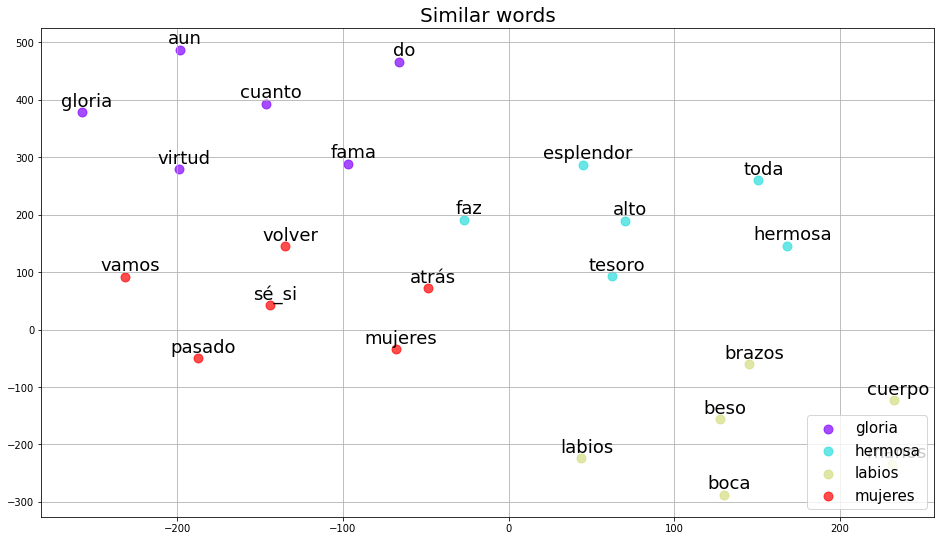

In [56]:
import matplotlib.cm as cm
def plot_embedding(title, labels, embedding_clusters, word_clusters, a, filename=None): 
  plt.figure(figsize=(16, 9))
  colors = cm.rainbow(np.linspace(0, 1, len(labels)))
  for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
    x = embeddings[:, 0]
    y = embeddings[:, 1]
    plt.scatter(x, y, c=color, alpha=a, label=label, s=80)
    for i, word in enumerate(words):
        plt.annotate(word, alpha=1.0, xy=(x[i], y[i]), xytext=(5, 2),
                      textcoords='offset points', ha='center', va='bottom',size=18)
  plt.legend(loc=4,prop={'size': 15})
  plt.title(title, fontsize=20 )
  plt.grid(True)
  plt.show()


plot_embedding('Similar words', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

Another example, this time we also plot the Voronoi set of the 'centroids' words, which are the ones used above ('gloria', 'hermosa', 'labios' and 'mujeres'). The lines of the Voronoi set divides the space into several regions. The points of each region are closer to each of the given centroids. As it is expected, the words that are most similar to the centroids are closer to their respective centroids. This means that after the TSNE embedding into the 2-dimensional space the similarity within the cluster elements and the dissimilarity between clusters remains. Notice for example that brazos is very near to the boundary which means that it is very similar to both 'labios' and 'hermosa'.

In [57]:
# words to plot
keys = ['gloria','hermosa','labios','mujeres']

# cluster for each word (more similar ones)
embedding_clusters = []
word_clusters = []

for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=5):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embeddings.append(model[word])
    words.append(word)
    embedding_clusters.append(embeddings)
    word_clusters.append(words)


embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=5000, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)


centers = []
embeddings_matrix = embeddings_en_2d.reshape(n*m, 2)
for i in range(len(keys)):
  centers.append(embeddings_matrix[(i+1)*5+i, :])



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

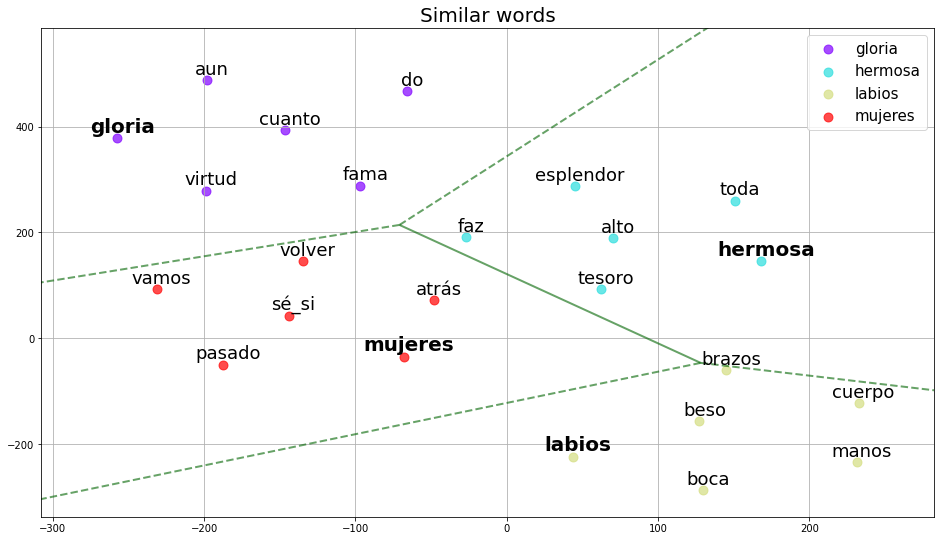

In [58]:
import matplotlib.cm as cm
from scipy.spatial import Voronoi, voronoi_plot_2d

def plot_embedding(title, labels, embedding_clusters, word_clusters, a, centers, filename=None): 
  
  plt.figure(figsize=(16, 9))
  
  ax = plt.gca()
  vor = Voronoi(centers)
  voronoi_plot_2d(vor, show_vertices=False, show_points =False, line_colors='darkgreen', ax=ax,
                 line_width=2, line_alpha=0.6, point_size=2)
  colors = cm.rainbow(np.linspace(0, 1, len(labels)))
  for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
    x = embeddings[:, 0]
    y = embeddings[:, 1]
    plt.scatter(x, y, c=color, alpha=a, label=label, s=80)
    for i, word in enumerate(words):
      if (i+1) % 6 == 0:
        plt.annotate(word, alpha=2.0, xy=(x[i], y[i]), xytext=(5, 2),
                      textcoords='offset points', ha='center', va='bottom',size=20, weight='bold')
      else:
        plt.annotate(word, alpha=1.0, xy=(x[i], y[i]), xytext=(5, 2),
                      textcoords='offset points', ha='center', va='bottom',size=18)
  plt.legend(loc=1
             ,prop={'size': 15})
  plt.title(title, fontsize=20 )
  plt.grid(True)
  plt.xlim(embedding_clusters[:,:,0].min()-50, embedding_clusters[:,:,0].max()+50)
  plt.ylim(embedding_clusters[:,:,1].min()-50, embedding_clusters[:,:,1].max()+100)
  
  plt.show()


plot_embedding('Similar words', keys, embeddings_en_2d, word_clusters, 0.7, centers,
                        'similar_words.png')

# Some final considerations

Unfortunately, we have come now to the end of the exploratory analysis 😢😢 But we could go on and continue exploring this corpus... It's the magic of NLP... it never ends! 

With this sheet, we now have an overall view of everything included on the dataset: kind of data, columns, scope, focus, and so on. We also made a little more sophisticated analysis including sentiments, and also a semantic representation of the data with the main to understand the kind of data we are dealing with. This has allowed us to reach the deepest knowledge, which is essential to future NLP tasks (or even, to improve the already used ones, as embeddings or sentiment analysis). So many conclusions could be obtained from this work, we are going to enumerate the most important ones:

1.  We have seen how much information we can capture from scrapped data from a website. With the EDA as well as the preprocessing and preliminary tasks carried out in this work we have been able to extract the relevant data from a webpage and convert it into an NLP problem of actual interest.
2.  We are working with a closed vocabulary, which is great for NLP poetry-focused tasks. With a corpus of a considerable size, we can easily get accurate results, and even more important: with semantic coherency! This opens a door to more deep tasks involving this kind of vocabulary, predictive tasks and so more!
3. Also, we have seen that the nature of the data is relevant in our study! In this case, we have used a bigram model to detect poetic collocations of words. With these considerations, we can deal with data more naturally and cohesively. 
4. Word embedding visualizations have shown us the scope of the vocabulary in the corpus, which includes the more typical words utilized in Poetry. We can capture the semantic, which is useful for many tasks: synonym, poetry recommendation systems, search for similar poems, poetry generators, and even what is more interesting/awesome: poetry retrieval tasks. Being dreamers, this kind of corpus could be used to identify the author of a specific poem, being able to deal with anonymous authors🤩 Does that sound too good to be true? 
